<a href="https://colab.research.google.com/github/Sudorenkoroma/HW_GI_ML/blob/main/HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
# Завантажуємо Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Номалізація зображень
train_images = train_images / 255.0
test_images = test_images / 255.0

# Зміна форми зображень для додавання додаткового каналу
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [30]:
# Визначеня моделі (ми ще не вивчали згорткові мережі,але як підсказали відкриті джерела
# досягти значень "найнаївнішої, але адекватної нейромережі" зі значеннями точності близько 91%
# використовуючи лише шари Dense майже не можливо. тому)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Резюме моделі
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 flatten_5 (Flatten)         (None, 1152)             

In [23]:
# Визначаємо умови для ранньої зупинки
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Тренеруємо модель
history = model.fit(train_images, train_labels, batch_size=64,
                    epochs=20,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

# Виведення значень точності та втрат, які модель обрала через активацію ранньої зупинки
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

Epoch 1/20
938/938 [==============================] - 58s 62ms/step - loss: 0.2226 - accuracy: 0.9191 - val_loss: 0.2534 - val_accuracy: 0.9087
Epoch 2/20
938/938 [==============================] - 57s 61ms/step - loss: 0.2079 - accuracy: 0.9233 - val_loss: 0.2480 - val_accuracy: 0.9119
Epoch 3/20
938/938 [==============================] - 57s 61ms/step - loss: 0.1929 - accuracy: 0.9293 - val_loss: 0.2650 - val_accuracy: 0.9115
Epoch 4/20
938/938 [==============================] - 59s 63ms/step - loss: 0.1808 - accuracy: 0.9325 - val_loss: 0.2717 - val_accuracy: 0.9074
Epoch 5/20
938/938 [==============================] - 57s 61ms/step - loss: 0.1680 - accuracy: 0.9364 - val_loss: 0.2646 - val_accuracy: 0.9140
Epoch 6/20
938/938 [==============================] - 59s 63ms/step - loss: 0.1576 - accuracy: 0.9411 - val_loss: 0.2880 - val_accuracy: 0.9101
Epoch 7/20
938/938 [==============================] - 58s 61ms/step - loss: 0.1450 - accuracy: 0.9456 - val_loss: 0.2680 - val_accuracy:

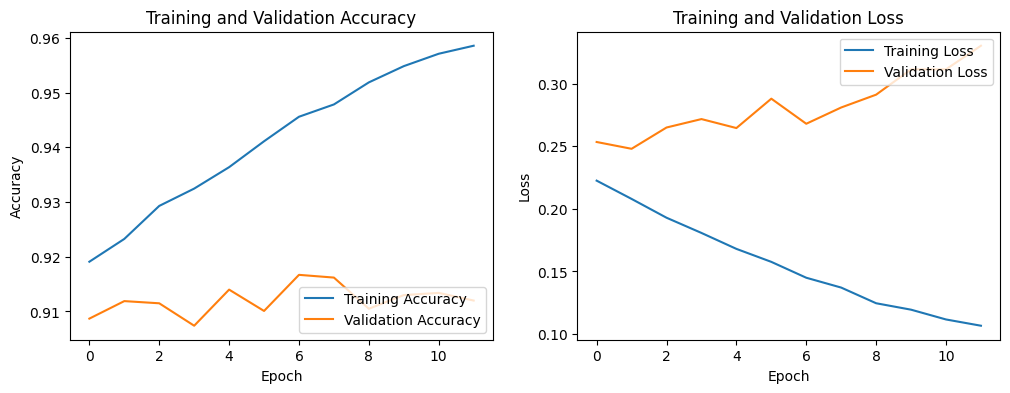

In [24]:
# Візуалізація динаміки точності та втрат на валідаційному на навчальному наборах
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


313/313 [==============================] - 3s 10ms/step


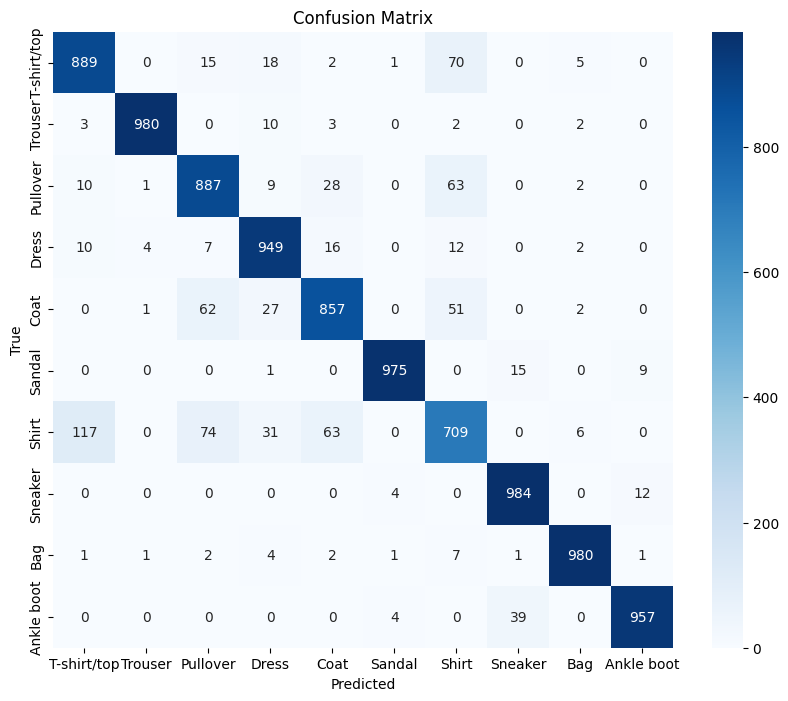

In [25]:
# Передбачення
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion Matrix
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Виведення confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Classification Report
print(classification_report(test_labels, predicted_labels, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.89      0.88      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.85      0.89      0.87      1000
       Dress       0.90      0.95      0.93      1000
        Coat       0.88      0.86      0.87      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.78      0.71      0.74      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



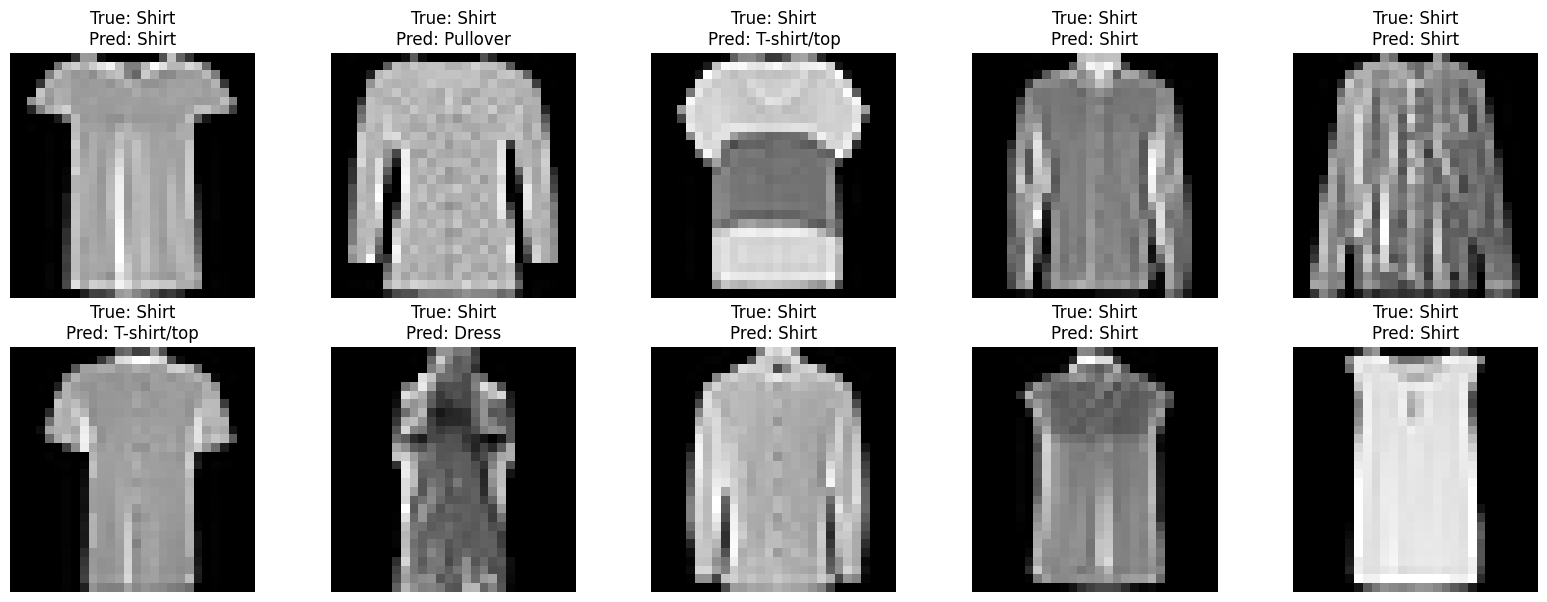

In [28]:
# Відображаємо 10 випадкових зображень сорочок з їхніми істиними та передбачуваними мітками
shirt_indices = np.where(test_labels == 6)[0]
sample_shirt_indices = np.random.choice(shirt_indices, 10, replace=False)

plt.figure(figsize=(20, 7))
for i, index in enumerate(sample_shirt_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[test_labels[index]]}\nPred: {class_names[predicted_labels[index]]}")
    plt.axis('off')

plt.show()

In [31]:
# За допомогою експерементів з параметрами мережі нам вдалося досягти значень точності вище 91% а саме 91,67%
# Як може здатися на графіках візуально схоже, що результати навчання вказують на динаміку зросту розбіжностей
# передбачень між валідаційними та навчальними наборами. Що зазвичай вказує на переначання моделі. Але слід звернути увагу
# що через вдалу випадкову ініціалізацію параметрів вагів, вже на першій епохі ми отримали досить високу точність і низькі втрати
# як на навчальному так і валідаційному наборі даних. тому подальше навчання не призвело до значних змін точності в тестовому наборі
# А на навчальних даних точність продовжувала зростати, що вказує на збільшення перенавчання моделі. Але задряки ранній зупинці
# ми отримали модель яка показала найкращі результати на тестовому наборі.
# як бачимо на Classification Report в моделі виникли пролеми з передбаченням сорочок
# за допомогою confusion matrix ми бачимо що модель часто путає сорочки з футболками, пуловерами, сукнями та пальто
# як показало виведення зразків, через низьку якість зображень сорочки дійсно важко відрізнити навіть для людського ока.